# Recap of the visualization tools

Up to now, we focus on NumPy and Pandas which are core libraries of any data science workflow. Studying those tools, we used some specific librairies for plotting. Mainly, we used:

* [matplotlib](https://matplotlib.org/)
* [pandas](https://pandas.pydata.org/)
* [seaborn](https://seaborn.pydata.org/)

In this notebook, we will give some more information about those tools which we discarded up to now.

## 1. Matplotlib

Matplotlib is a general plotting library giving the freedom regarding plot editing. A lot of plotting libraries (pandas, seaborn, etc.) are using this library as their core engine.

In this section, we will focus on some aspects which are interested to know when you want to customize your plots. In any case, do not hesitate to refer to the [matplotlib gallery](https://matplotlib.org/gallery/index.html) having numerous of examples which can be used as the base for your plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 1.1 Single axis plotting

Let's take a simple example wher we would like to plot the function $f(x) = cos(x)$

In [2]:
x = np.arange(-10, 10, 0.2)
fx = np.cos(x)

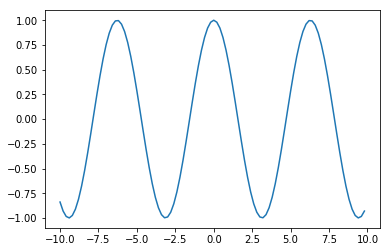

In [3]:
plt.plot(x, fx)

It is actually easy to put several line on the same plot:

In [4]:
gx = np.cos(2 * x)

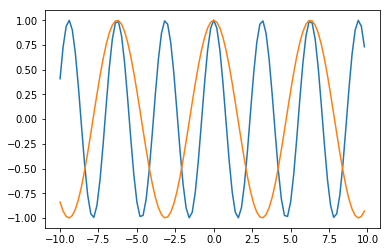

In [5]:
plt.plot(x, gx)
plt.plot(x, fx)

The parameter `label` allow to associate a line plot with a specific tag. To show the legend, you need to call the `plt.legend()` function. Refer to the matplotlib tutorial regarding the [legend guide](https://matplotlib.org/users/legend_guide.html) for more details.

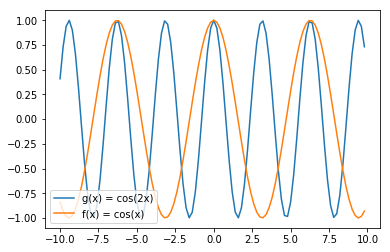

In [6]:
plt.plot(x, gx, label="g(x) = cos(2x)")
plt.plot(x, fx, label="f(x) = cos(x)")
plt.legend(loc=3)

The line style can easily be edited throw the parameters: `color`, `linewidth`, `linestyle`, `marker`, and `markersize`.

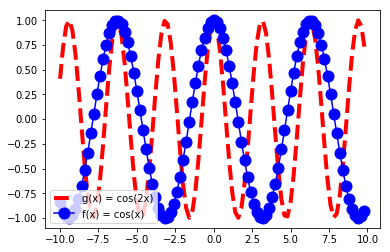

In [7]:
plt.plot(x, gx, label="g(x) = cos(2x)", linewidth=4, linestyle='--', color='red')
plt.plot(x, fx, label="f(x) = cos(x)", marker='o', markersize=11, color='blue')
plt.legend(loc=3)

You can add labels and title as well.

Text(0,0.5,'y')

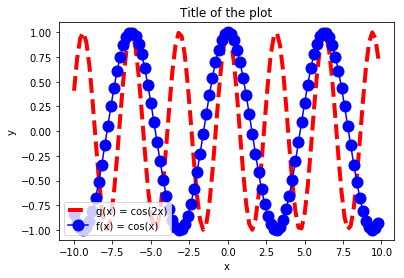

In [8]:
plt.plot(x, gx, label="g(x) = cos(2x)", linewidth=4, linestyle='--', color='red')
plt.plot(x, fx, label="f(x) = cos(x)", marker='o', markersize=11, color='blue')
plt.legend(loc=3)
plt.title('Title of the plot')
plt.xlabel('x')
plt.ylabel('y')

Some other useful functions (but not limited too): `axis`, `xticks`, or `yticks`.

([<matplotlib.axis.YTick at 0x2255053dba8>,
 <a list of 3 Text yticklabel objects>)

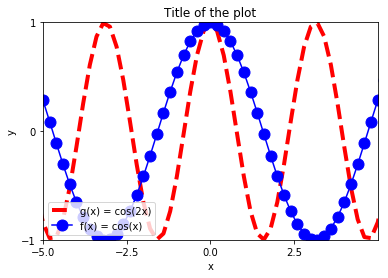

In [9]:
plt.plot(x, gx, label="g(x) = cos(2x)", linewidth=4, linestyle='--', color='red')
plt.plot(x, fx, label="f(x) = cos(x)", marker='o', markersize=11, color='blue')
plt.legend(loc=3)
plt.title('Title of the plot')
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-5, 5, -1, 1])
plt.xticks(np.arange(-5, 5, 2.5))
plt.yticks([-1, 0, 1])

### 1.2 Plot using several axis

It is really handy to be able to plot into several axis sometime. You can use the function `plt.subplots` to be able to do so.

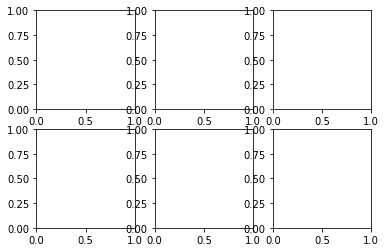

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=3)

In [11]:
print(axs)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022550572550>


We can see that `subplots` will create the number of desired axis and will return a list of those axis which can be used for plotting the data.

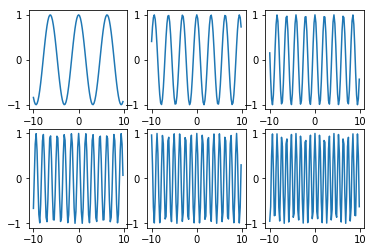

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3)
for ax, alpha in zip(axs.ravel(), range(1, 7)):
    ax.plot(x, np.cos(alpha * x))

You can set the label by using `ax` instead of `plt` and usually the function `set_` instead of the plain function. In case that you have issue with overlapping label, you can use the function `plt.tight_layout()` at the end of your plotting.

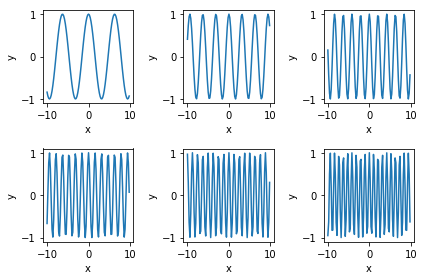

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=3)
for ax, alpha in zip(axs.ravel(), range(1, 7)):
    ax.plot(x, np.cos(alpha * x))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
plt.tight_layout()

## 2. Pandas

We saw in the previous notebooks that `pandas` allows to easily plot information which are contains into `DataFrame` or `Series`. Basically, `pandas` is calling `matplotlib` facilities and decorate the plots with the information stored in the `DataFrame` (e.g. columns name). Therefore, `pandas` allows to reduce the code to be written in order to plot lines.

Refer to the [visualization guide](https://pandas.pydata.org/pandas-docs/stable/visualization.html) for a full description of `pandas` feature.

In [14]:
import pandas as pd

In [15]:
df = pd.DataFrame({'f(x)=cos(x)': np.cos(x),
                   'g(x)=cos(2x)': np.cos(2*x)},
                  index=x)
df.head()

,f(x)=cos(x),g(x)=cos(2x)
-10.0,-0.839072,0.408082
-9.8,-0.930426,0.731386
-9.6,-0.984688,0.939220
-9.4,-0.999693,0.998772
-9.2,-0.974844,0.900640


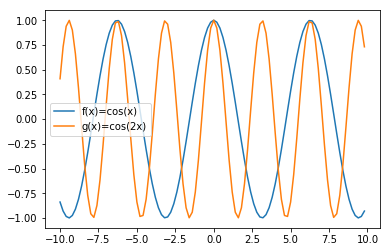

In [16]:
df.plot()

## 3. Seaborn

`seaborn` offers some advanced plotting for data exploration which would be more difficult to write solely in `matplotlib`. `seaborn` is using both `matplotlib` and `pandas` to provide those plotting extensions.

Refer to the [searborn gallery](https://seaborn.pydata.org/examples/index.html) to see all additional plots given by `seaborn`.

Herein, we will present couple of functions which are really useful even if you are only using normal plot from `matplotlib`.

When using `matplotlib` a typical mistake is to keep the original style in which the font size and line can be too small depending of the media in which you want to show your plots (i.e. presentation, paper, report, etc.)

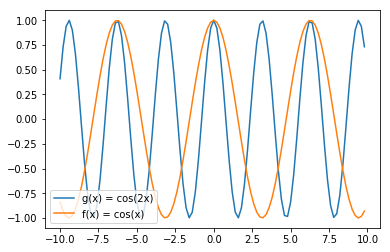

In [17]:
plt.plot(x, gx, label="g(x) = cos(2x)")
plt.plot(x, fx, label="f(x) = cos(x)")
plt.legend(loc=3)

`seaborn` offers a context manager, `plotting_context()` which will automatically change the plotting style depending of your media.

In [18]:
import seaborn as sns

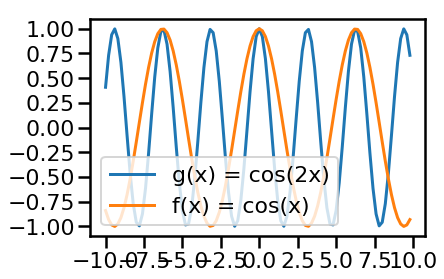

In [19]:
with sns.plotting_context("poster"):  # could be also one of {paper, notebook, talk, poster}
    plt.plot(x, gx, label="g(x) = cos(2x)")
    plt.plot(x, fx, label="f(x) = cos(x)")
    plt.legend(loc=3)

In the case that the figure is difficult to read, we should probably remove information which are not necessary:

* Remove the ticks which are not necessary using the `xticks()` and `yticks()` functions.
* Remove the spines using the `sns.despine()` function.
* Limit the range of values with `axis()` function.
* Optionally move the legend.

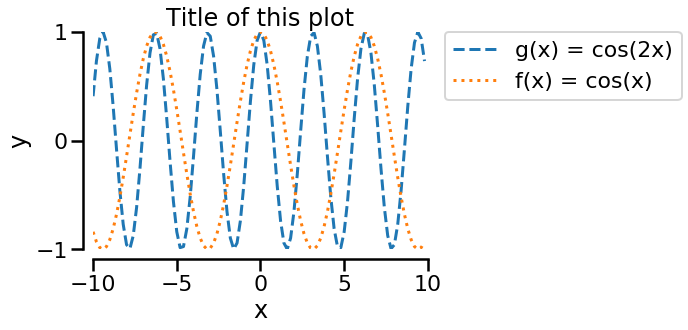

In [20]:
with sns.plotting_context("poster"):  # could be also one of {paper, notebook, talk, poster}
    plt.plot(x, gx, label="g(x) = cos(2x)", linestyle='--')
    plt.plot(x, fx, label="f(x) = cos(x)", linestyle=':')
    plt.xticks(np.arange(-10, 11, 5))
    plt.yticks([-1, 0, 1])
    sns.despine(offset=10)
    plt.axis([-10, 10, -1, 1])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Title of this plot')

## 4. Bokeh

The previous library provides static plot. Sometime, you will be interested to have some interactive plot. In this regard, `bokeh` provides such functionality as the example presented below.

In [21]:
# Standard imports 

from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [22]:
# Plot a complex chart with intearctive hover in a few lines of code

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)